In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings

def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # Making the float outputs limit to 3 decimal points

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


# **Data Exploration and Pre-processing**

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')
samp_sub = pd.read_csv('/kaggle/input/playground-series-s3e25/sample_submission.csv')

In [4]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.000,0.842,10.000,4.800,20.613,11.088,2.766,1.732,0.860,0.496,0.915,6.000
1,1,100.000,7.558,10.000,4.800,20.299,12.041,2.755,1.631,0.910,0.493,0.718,6.500
2,2,76.000,8.886,15.600,5.600,33.739,12.086,2.828,1.788,0.864,0.481,1.506,2.500
3,3,100.000,8.795,10.000,4.800,20.213,10.948,2.648,1.626,0.936,0.489,0.789,6.000
4,4,116.000,9.578,11.600,4.800,24.988,11.824,2.766,1.682,0.896,0.493,1.865,6.000


In [5]:
test.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.000,121.420,35.360,5.280,82.561,9.370,2.298,1.907,1.200,0.462,1.795
1,10408,90.000,9.932,18.000,5.600,39.568,12.086,2.868,1.652,0.864,0.476,1.412
2,10409,116.000,7.768,11.600,4.800,23.232,11.024,2.644,1.794,0.960,0.500,0.788
3,10410,100.000,9.108,10.000,4.800,20.299,12.086,2.828,1.662,0.792,0.496,1.205
4,10411,55.000,4.030,11.000,4.000,22.978,11.281,2.455,1.750,0.893,0.476,0.935


In [6]:
samp_sub.head()

,id,Hardness
0,10407,4.647
1,10408,4.647
2,10409,4.647
3,10410,4.647
4,10411,4.647


In [7]:
train.isnull().mean()*100

id                      0.000
allelectrons_Total      0.000
density_Total           0.000
allelectrons_Average    0.000
val_e_Average           0.000
atomicweight_Average    0.000
ionenergy_Average       0.000
el_neg_chi_Average      0.000
R_vdw_element_Average   0.000
R_cov_element_Average   0.000
zaratio_Average         0.000
density_Average         0.000
Hardness                0.000
dtype: float64

In [8]:
test.isnull().mean()*100

id                      0.000
allelectrons_Total      0.000
density_Total           0.000
allelectrons_Average    0.000
val_e_Average           0.000
atomicweight_Average    0.000
ionenergy_Average       0.000
el_neg_chi_Average      0.000
R_vdw_element_Average   0.000
R_cov_element_Average   0.000
zaratio_Average         0.000
density_Average         0.000
dtype: float64

**No null values!**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


**Looks like a perfect dataset for regression.**

#### **Side: A beautiful module for visualizing null values**

<Axes: >

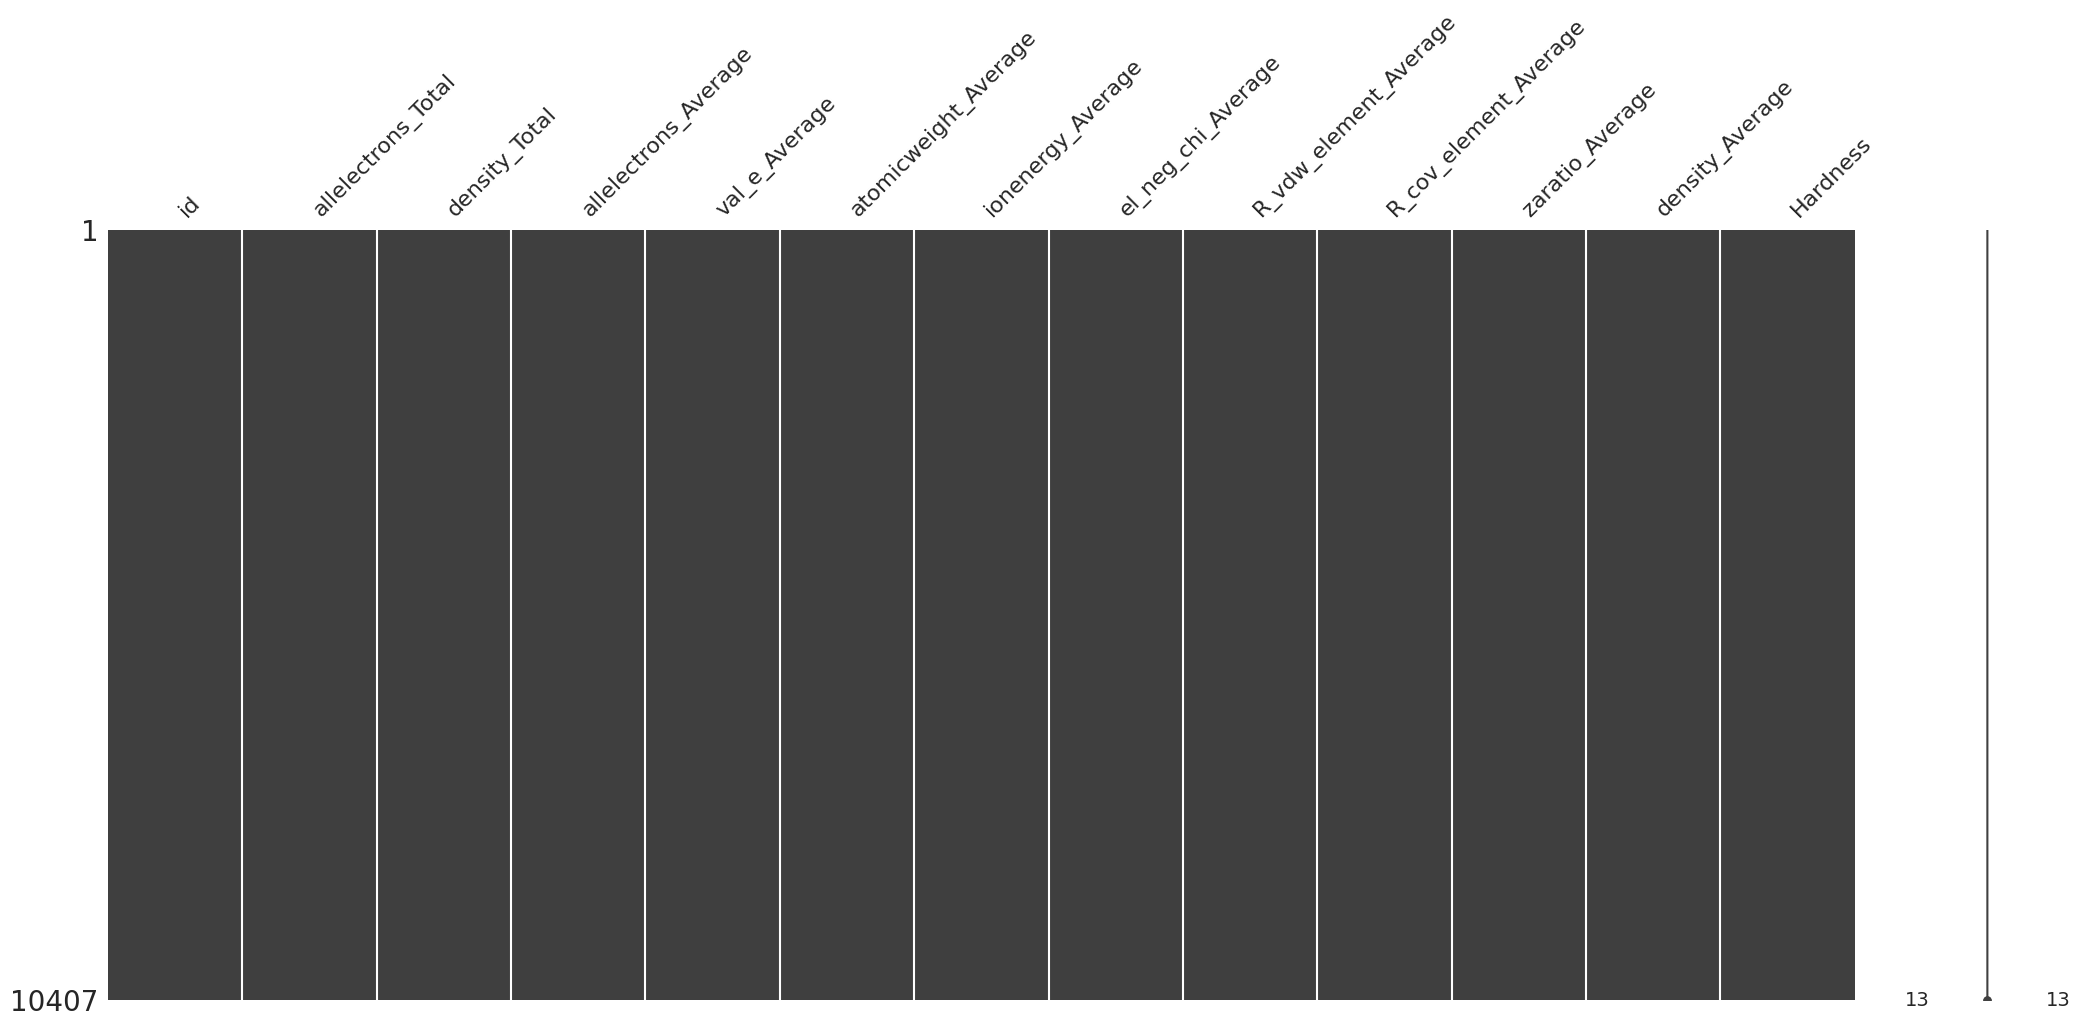

In [10]:
import missingno

missingno.matrix(train, sparkline=True)